In [1]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as skl

# Utils

In [2]:
def imprimir_titulo_ejercicio(x):
    print('=======================================================================')
    print('Ejercicio ',x)
    print('=======================================================================')

# Ejercicio 1
![Ejercicio 3.1](enunciados_ejercicios3/ejercicio1.png "Ejercicio 3.1")

$$f_{XY}(x,y) = \frac{\exp\left(-2x + \frac{y}{4x+2}\right)}{2x+1}$$

$$f_{XY}(x,y) =  2 \exp\left(-2x\right) \cdot \frac{\exp\left(\frac{y}{4x+2}\right)}{4x+2} = f_X (x) \cdot f_{Y|X=x}(y)$$

$$f_X(x) = 2 \exp(-2x) \quad \longrightarrow \quad X \sim \Epsilon(2) $$

$$f_{Y|X=x}(y) =  \frac{\exp\left(\frac{y}{4x+2}\right)}{4x+2} \quad \longrightarrow \quad Y|X=x \sim \Epsilon\left(\frac{1}{4x+2}\right)$$

$$ Y = \Epsilon(4X+2) = (4X+2)\cdot\Epsilon(1) \quad \longrightarrow \quad Y = (4X+2) \cdot U \quad \wedge \quad U \sim E(1)$$

# Ejercicio 2
![Ejercicio 3.2](enunciados_ejercicios3/ejercicio2.png "Ejercicio 3.2")

In [3]:
# Implementacion de PCA
class PCA:
    def __init__(self):
        self.sigma = None
        self.D = None
        self.P = None
        self.n_componentes = None
    
    def fit(self,X):
        n_samples = X.shape[0]
        self.n_componentes = X.shape[1]
        self.sigma = X.T @ X / n_samples
        [self.D,self.P] = np.linalg.eig(self.sigma)

    def transform(self,X,componentes):
        V = self.P[:,0:componentes]
        U = np.dot(V.T,X.T)
        return np.dot(V,U).T
    
    def transform_latent(self,X,componentes):
        V = self.P[:,0:componentes]
        return np.dot(V.T,X.T).T

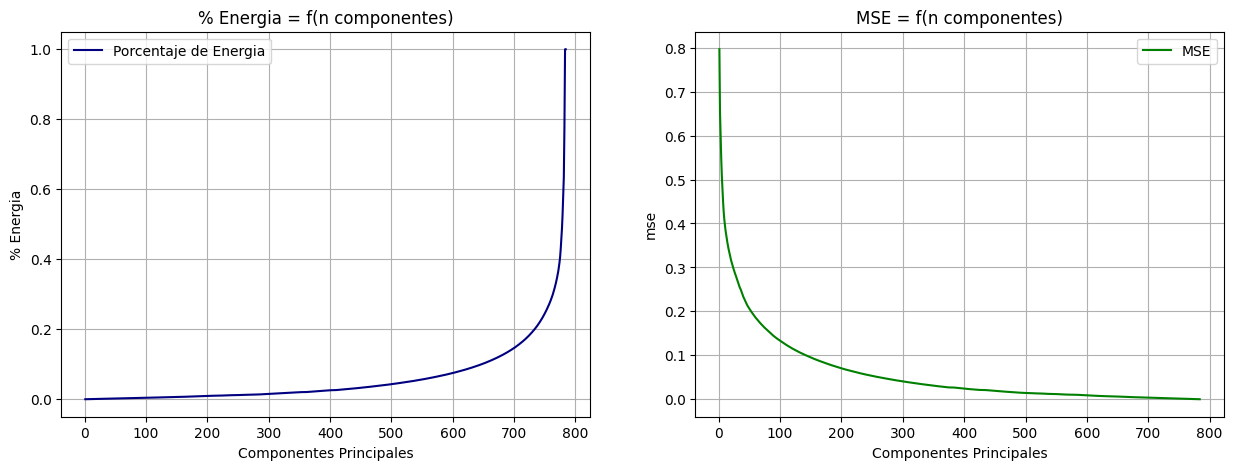

Ejercicio  C
N_componentes = 1


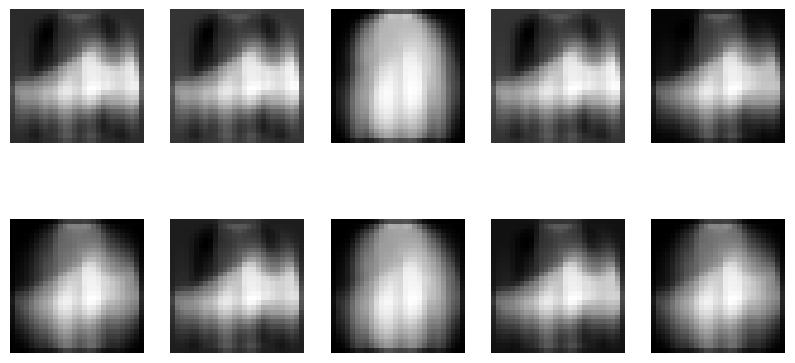

N_componentes = 101


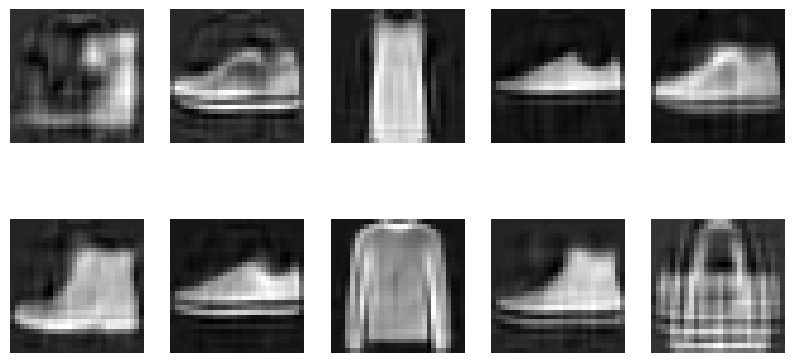

N_componentes = 776


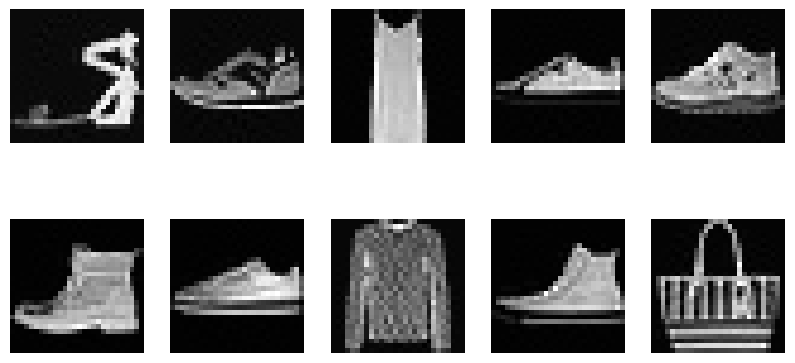

Ejercicio  D


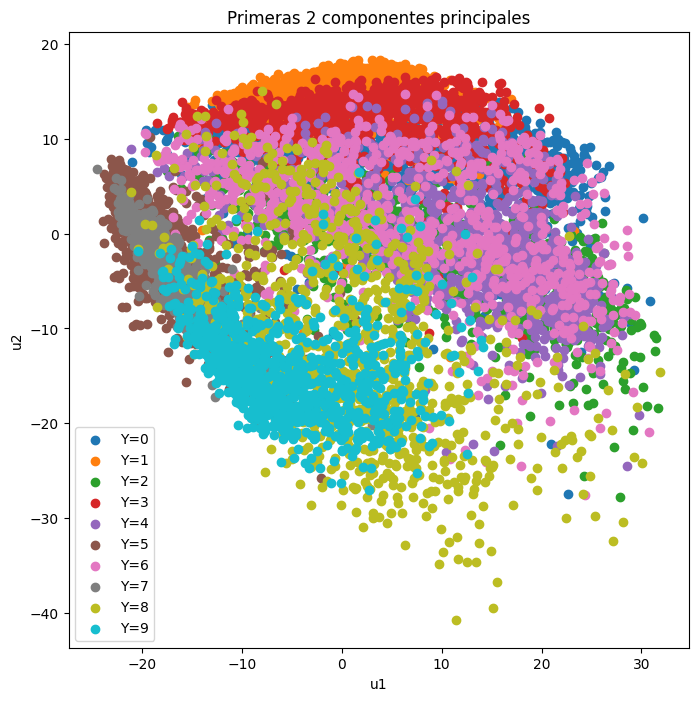

In [4]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

#=======================================================================
# Ejercicio A
#=======================================================================

# Load Datasets from tensorflow
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

n_samples = X_train.shape[0]
img_dims = (X_train.shape[1],X_train.shape[2])
n_pixels = X_train.shape[1] * X_train.shape[2]

X_train_flat = X_train.reshape(-1,n_pixels)
X_test_flat = X_test.reshape(-1,n_pixels)

# Normalizo el conjunto de entrenamiento y el de testeo
scaler = StandardScaler()
scaler.fit(X_train_flat)

X_train_flat_scaled = scaler.transform(X_train_flat)
X_test_flat_scaled = scaler.transform(X_test_flat)


# Creo una instancia de PCA y lo ajusto a los datos de entrenamiento
pca = PCA()
pca.fit(X_train_flat_scaled)


# Calculo el porcentaje de energia en funcion de la cantidad de componentes principales
componentes = np.arange(pca.D.shape[0]) + 1
energias = np.zeros(pca.D.shape[0])
energia_total = pca.D.sum()

for i in componentes:
    energias[i-1] = np.sum(pca.D[-1-i:-1])/energia_total


#=======================================================================
# Ejercicio B
#=======================================================================

mse = np.zeros(pca.D.shape[0])
for idx,i in enumerate(componentes):
    X_test_hat = pca.transform(X_test_flat_scaled,i)
    mse[idx] = mean_squared_error(X_test_flat_scaled , X_test_hat)


# Grafico los resultados obtenidos
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(componentes,energias,color='Navy',label='Porcentaje de Energia')

plt.title ('% Energia = f(n componentes)')
plt.xlabel('Componentes Principales')
plt.ylabel('% Energia')
plt.legend()
plt.grid()


plt.subplot(1,2,2)
plt.plot(componentes,mse,color='green',label='MSE')

plt.title ('MSE = f(n componentes)')
plt.xlabel('Componentes Principales')
plt.ylabel('mse')
plt.legend()
plt.grid()

plt.show()

#=======================================================================
# Ejercicio C
#=======================================================================

# Transformo el set de entrenamiento para las distintas cantidades de componentes principales
X_test_hat1 = scaler.inverse_transform(pca.transform(X_test_flat_scaled,1)).reshape(-1,img_dims[0],img_dims[1])
X_test_hat101 = scaler.inverse_transform(pca.transform(X_test_flat_scaled,101)).reshape(-1,img_dims[0],img_dims[1])
X_test_hat776 = scaler.inverse_transform(pca.transform(X_test_flat_scaled,776)).reshape(-1,img_dims[0],img_dims[1])

imprimir_titulo_ejercicio('C')

# Grafico 10 imagenes elegidas al azarde cada transformacion del set de testeo.
N_samples = 10
idxs = np.random.choice(np.arange(1, X_test.shape[0]), size=N_samples, replace=False)

print('==============================')
print('N_componentes = 1')
print('==============================')
plt.figure(figsize=(10,5))
for i,ix in enumerate(idxs):
    plt.subplot(2,int(N_samples/2),i+1)
    plt.imshow(X_test_hat1[ix],cmap='gray')
    plt.axis('off')
plt.show()

print('==============================')
print('N_componentes = 101')
print('==============================')

plt.figure(figsize=(10,5))
for i,ix in enumerate(idxs):
    plt.subplot(2,int(N_samples/2),i+1)
    plt.imshow(X_test_hat101[ix],cmap='gray')
    plt.axis('off')
plt.show()

print('==============================')
print('N_componentes = 776')
print('==============================')
plt.figure(figsize=(10,5))
for i,ix in enumerate(idxs):
    plt.subplot(2,int(N_samples/2),i+1)
    plt.imshow(X_test_hat776[ix],cmap='gray')
    plt.axis('off')
plt.show()

#=======================================================================
# Ejercicio D
#=======================================================================

imprimir_titulo_ejercicio('D')

# Extraigo las primeras 2 componentes principales
X_hat2 = pca.transform_latent(X_test_flat_scaled,2)

classes = np.unique(Y_test)

# Grafico un scatter
plt.figure(figsize=(8,8))

for i,y in enumerate(classes):
    X_plot = X_hat2[Y_test == y,:]
    plt.scatter(X_plot[:,0],X_plot[:,1],label='Y='+str(y))

plt.title('Primeras 2 componentes principales')
plt.xlabel('u1')
plt.ylabel('u2')
plt.legend()
plt.show()


Ejercicio  F


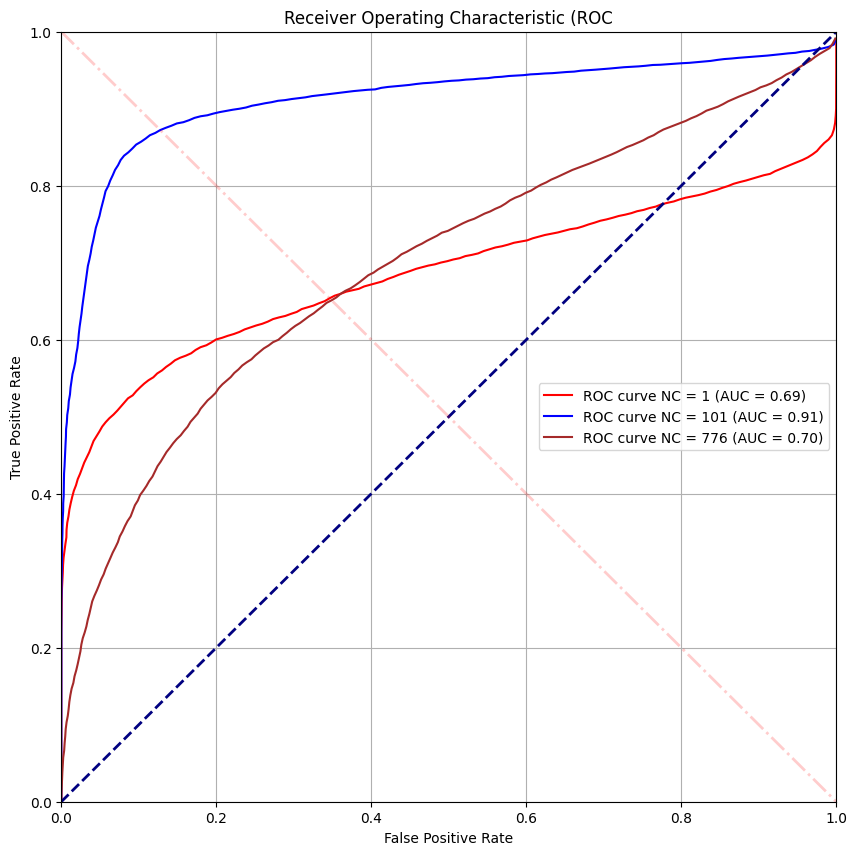

In [30]:
from sklearn.metrics import roc_curve, auc


#=======================================================================
# Ejercicio E
#=======================================================================
# Load MNIST Datasets from tensorflow
(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Armo el dataset para deteccion de anomlias. Las no anomalias las clasifico como 1 y las anomalias como 0
X_bd_testeo = np.row_stack((X_test,X_test_mnist))
Y_bd_teste0 = np.concatenate((np.ones(X_test.shape[0]),np.zeros(X_test_mnist.shape[0])))



#=======================================================================
# Ejercicio F
#=======================================================================

# Voy a calcular la roc haciendo PCA con los siguientes numeros de componentes
vec_componentes = [1,101,776]

# Hago la prediccion de si es una anomalia o no y  calcul0 la ROC
th_max = 0.01
th_min = 0 
th_step = 0.00001
umbrales = []

for j,nc in enumerate(vec_componentes):
    X_hat = pca.transform(scaler.transform(X_bd_testeo.reshape(-1,n_pixels)),nc)
    mse = np.mean((scaler.transform(X_bd_testeo.reshape(-1,n_pixels))-X_hat)**2 , axis = 1)
    umbrales.append(np.sort(mse)[0:-1:100])

# Inicializo los vectores que van a contener los FPR y TPR
TPR = np.zeros((len(vec_componentes),umbrales[0].shape[0]))
FPR = np.zeros((len(vec_componentes),umbrales[0].shape[0]))
roc_auc = np.zeros(len(vec_componentes))

# Armo una funcion para estimar las anomalias en funcion de un umbral th
def predict_anomlitie(pca,X,componentes,th):
    X_hat = pca.transform(X,componentes)
    pred = np.mean((X-X_hat)**2 , axis = 1) < th
    return pred.reshape(-1)

# Par cada valor de umbral calculo el TPR y el FPR y los guardo
for j,nc in enumerate(vec_componentes):
    for i,t in enumerate(umbrales[j]):
        y_pred = predict_anomlitie(pca,scaler.transform(X_bd_testeo.reshape(-1,n_pixels)),nc,t)
        TPR[j,i] = (y_pred[Y_bd_teste0 == 1]).mean()
        FPR[j,i] = (y_pred[Y_bd_teste0 == 0]).mean()
    roc_auc[j] = auc(FPR[j,:], TPR[j,:])


imprimir_titulo_ejercicio('F')
plt.figure(figsize=(10,10))

colors = ['red','blue','brown']

for j,nc in enumerate(vec_componentes):
    plt.plot(FPR[j,:],TPR[j,:],color = colors[j] , label='ROC curve NC = %d (AUC = %0.2f)' %(nc,roc_auc[j]))
    plt.scatter(FPR[j,np.argmin(abs(FPR[j,:]-(1-TPR[j,:])))],TPR[j,np.argmin(abs(FPR[j,:]-(1-TPR[j,:])))],color = 'navy',marker='o',label="Punto EER")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot([0, 1], [1, 0], color='red', lw=2, linestyle='-.',alpha=0.2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC')
plt.grid()
plt.legend()
plt.show()
